<a href="https://colab.research.google.com/github/olini/alura-ds-series-temporais/blob/main/modulo-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando assinantes da newsletter da Alucar

# 0. Imports

In [13]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## 0.1. Configurações

In [14]:
sns.set(rc={'figure.figsize':(25,12)})

# 1. Carregar dados

In [2]:
assinantes = pd.read_csv('newsletter_alucar.csv')

In [3]:
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


# 2. Descrição dos dados

In [5]:
print('Numero de linhas e colunas: ', assinantes.shape)
print('Numero de valores nulos: ', assinantes.isna().sum().sum())

Numero de linhas e colunas:  (24, 2)
Numero de valores nulos:  0


In [6]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

#3. Trasnformação dos dados
## 3.1. Coluna mes

In [8]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [9]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

#4. Decomposição dos dados

In [11]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


#5. Visualização dos dados

In [15]:
def plot_grafico(x, y, data, titulo, xlabel, ylabel):
  ax = sns.lineplot(x=x, y=y, data=data, marker='o')
  ax.set_title(titulo, loc='left', fontsize=18)
  ax.set_xlabel(xlabel, fontsize=14)
  ax.set_ylabel(ylabel, fontsize=14);

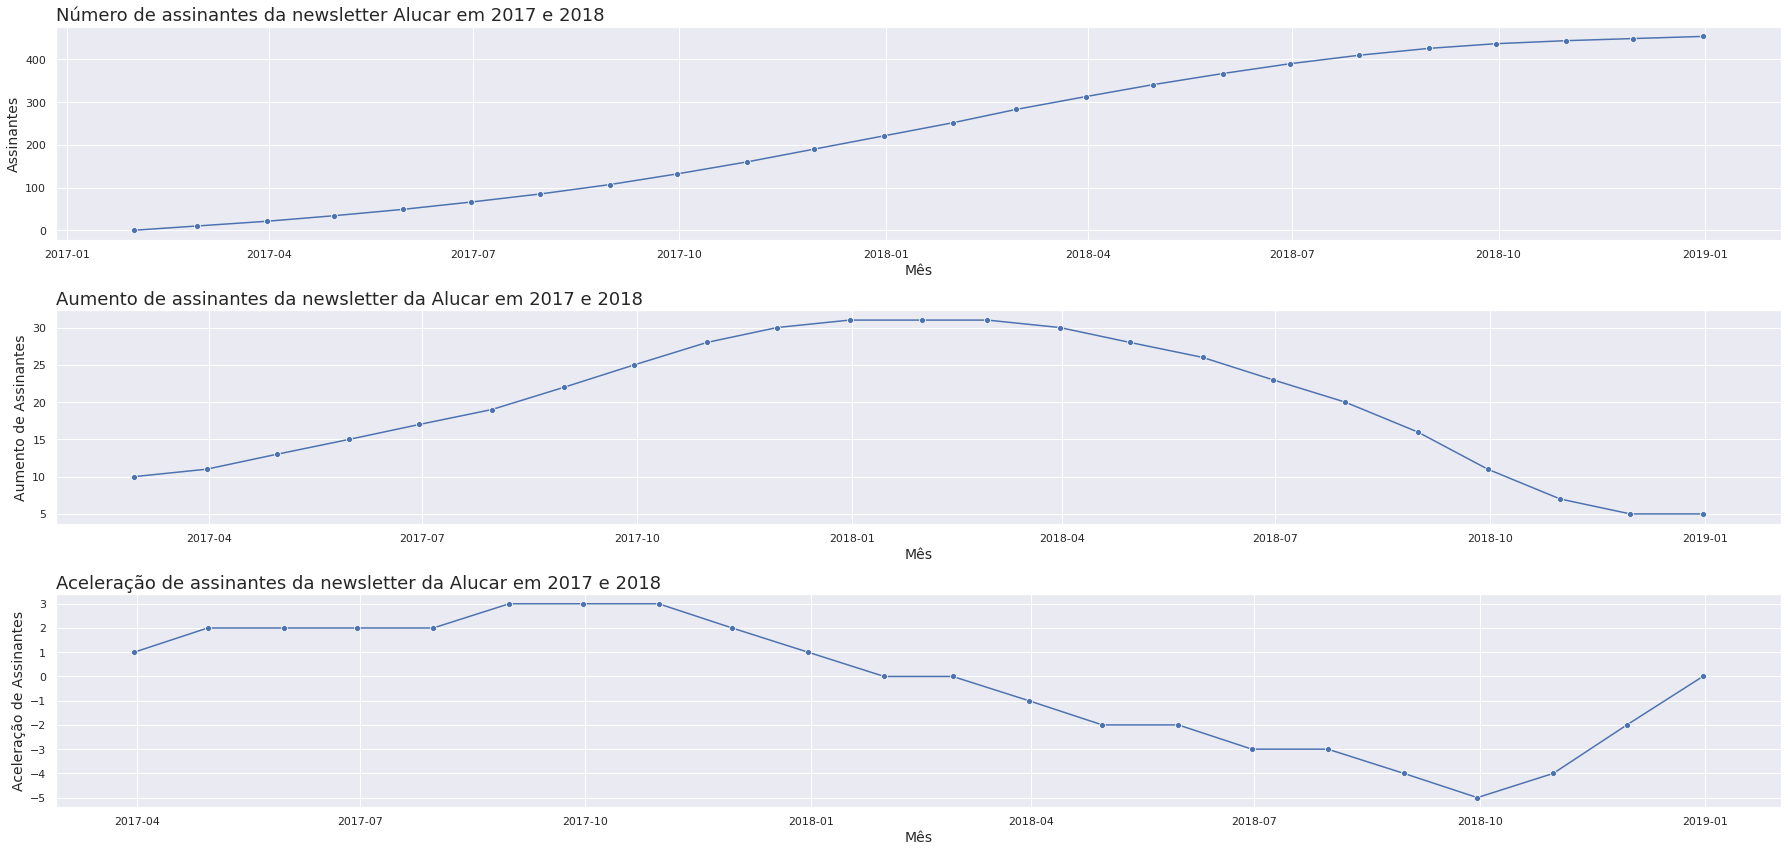

In [17]:
plt.subplot(3, 1, 1)
plot_grafico('mes', 'assinantes', assinantes, 'Número de assinantes da newsletter Alucar em 2017 e 2018', 
             'Mês', 'Assinantes')
plt.subplot(3, 1, 2)
plot_grafico('mes', 'aumento', assinantes, 'Aumento de assinantes da newsletter da Alucar em 2017 e 2018', 
             'Mês', 'Aumento de Assinantes')
plt.subplot(3, 1, 3)
plot_grafico('mes', 'aceleracao', assinantes, 'Aceleração de assinantes da newsletter da Alucar em 2017 e 2018', 
             'Mês', 'Aceleração de Assinantes')

plt.tight_layout()

# Analisando vendas da Chocolura

# 1. Carregar dados

In [18]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


# 2. Descrição dos dados

In [19]:
print('Numero de linhas e colunas: ', chocolura.shape)
print('Numero de valores nulos: ', chocolura.isna().sum().sum())

Numero de linhas e colunas:  (24, 2)
Numero de valores nulos:  0


In [20]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

# 3. Transformação dos dados
# 3.1. Coluna mes

In [21]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])

In [22]:
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

# 4. Decomposição dos dados

In [24]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


# 5. Visualização dos dados

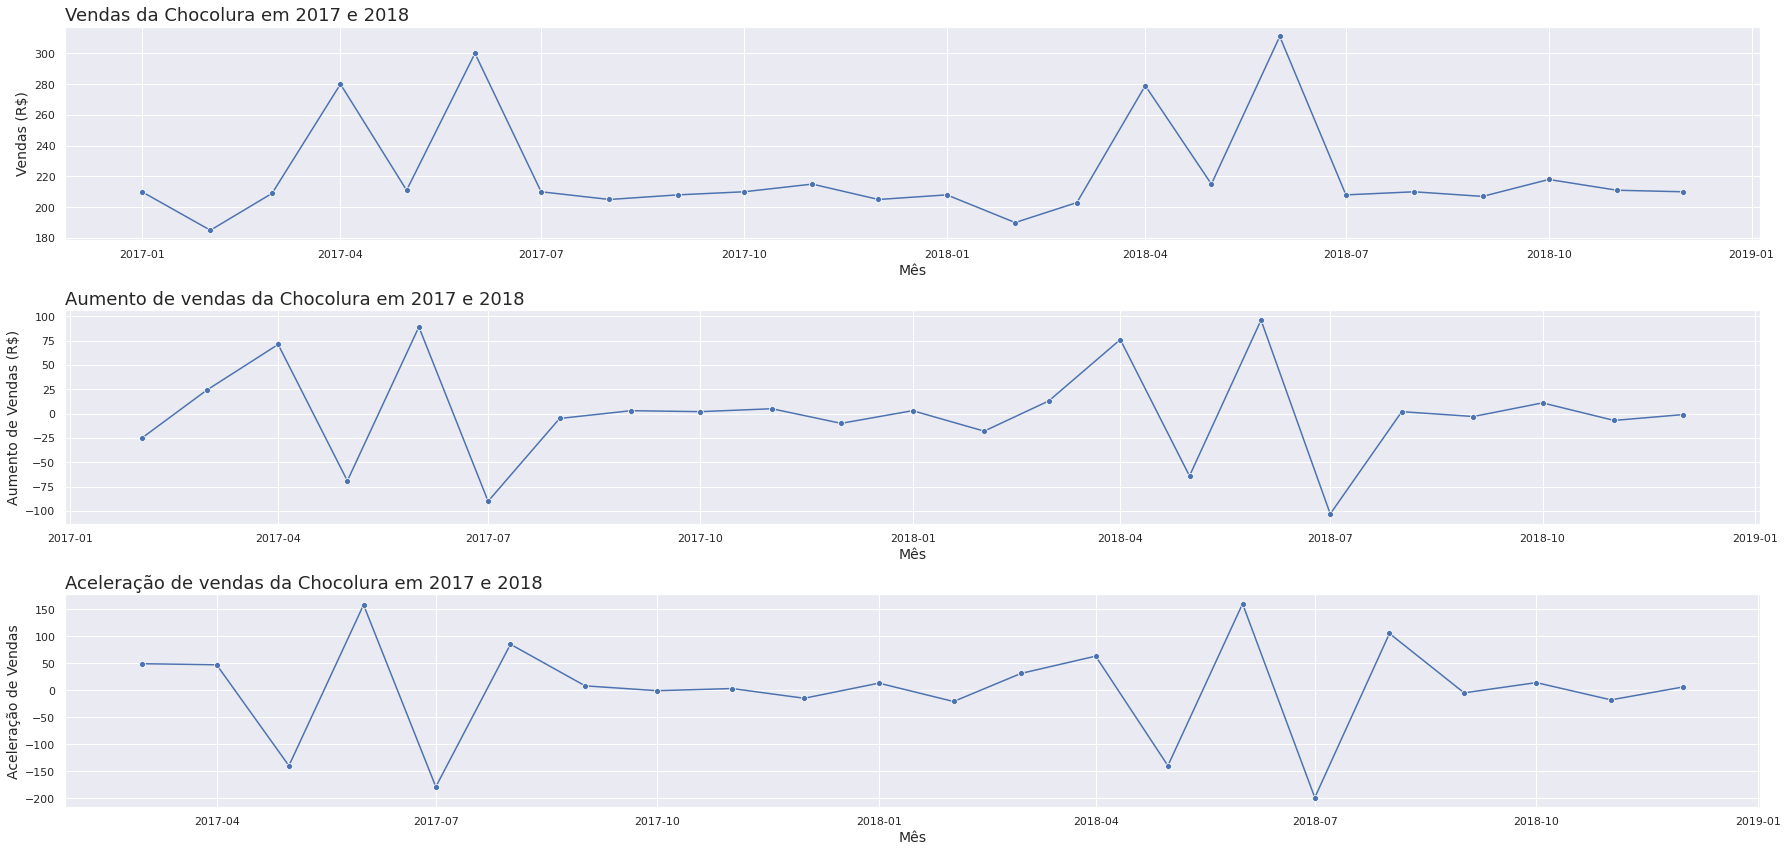

In [25]:
plt.subplot(3, 1, 1)
plot_grafico('mes', 'vendas', chocolura, 'Vendas da Chocolura em 2017 e 2018', 
             'Mês', 'Vendas (R$)')
plt.subplot(3, 1, 2)
plot_grafico('mes', 'aumento', chocolura, 'Aumento de vendas da Chocolura em 2017 e 2018', 
             'Mês', 'Aumento de Vendas (R$)')
plt.subplot(3, 1, 3)
plot_grafico('mes', 'aceleracao', chocolura, 'Aceleração de vendas da Chocolura em 2017 e 2018', 
             'Mês', 'Aceleração de Vendas')

plt.tight_layout()

Com os gráficos acima, é possível identificar uma sazonalidade nos dados. Nos meses 4 e 7, se observa um pico de volume de vendas, assim como de aumento de vendas e aceleração do aumento. Esses picos poderiam ser explicados por datas comemorativas nos meses, Páscoa e Dia dos Namorados, respectivamente.

## Chocolura - Análise de vendas diárias em Outubro e Novembro de 2018

# 6. Carregar os dados

In [26]:
vendas_diarias = pd.read_csv('vendas_por_dia.csv')
vendas_diarias.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


# 7. Descrição dos dados

In [27]:
print('Numero de linhas e colunas: ', vendas_diarias.shape)
print('Quantidade de valores nulos: ', vendas_diarias.isna().sum().sum())

Numero de linhas e colunas:  (61, 2)
Quantidade de valores nulos:  0


In [28]:
vendas_diarias.dtypes

dia       object
vendas     int64
dtype: object

# 8. Transformação dos dados
# 8.1. Coluna dia

In [30]:
vendas_diarias['dia'] = pd.to_datetime(vendas_diarias['dia'])
vendas_diarias.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

# 9. Decomposição dos dados

In [31]:
vendas_diarias['aumento'] = vendas_diarias['vendas'].diff()
vendas_diarias['aceleracao'] = vendas_diarias['aumento'].diff()
vendas_diarias.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


# 10. Visualização dos dados

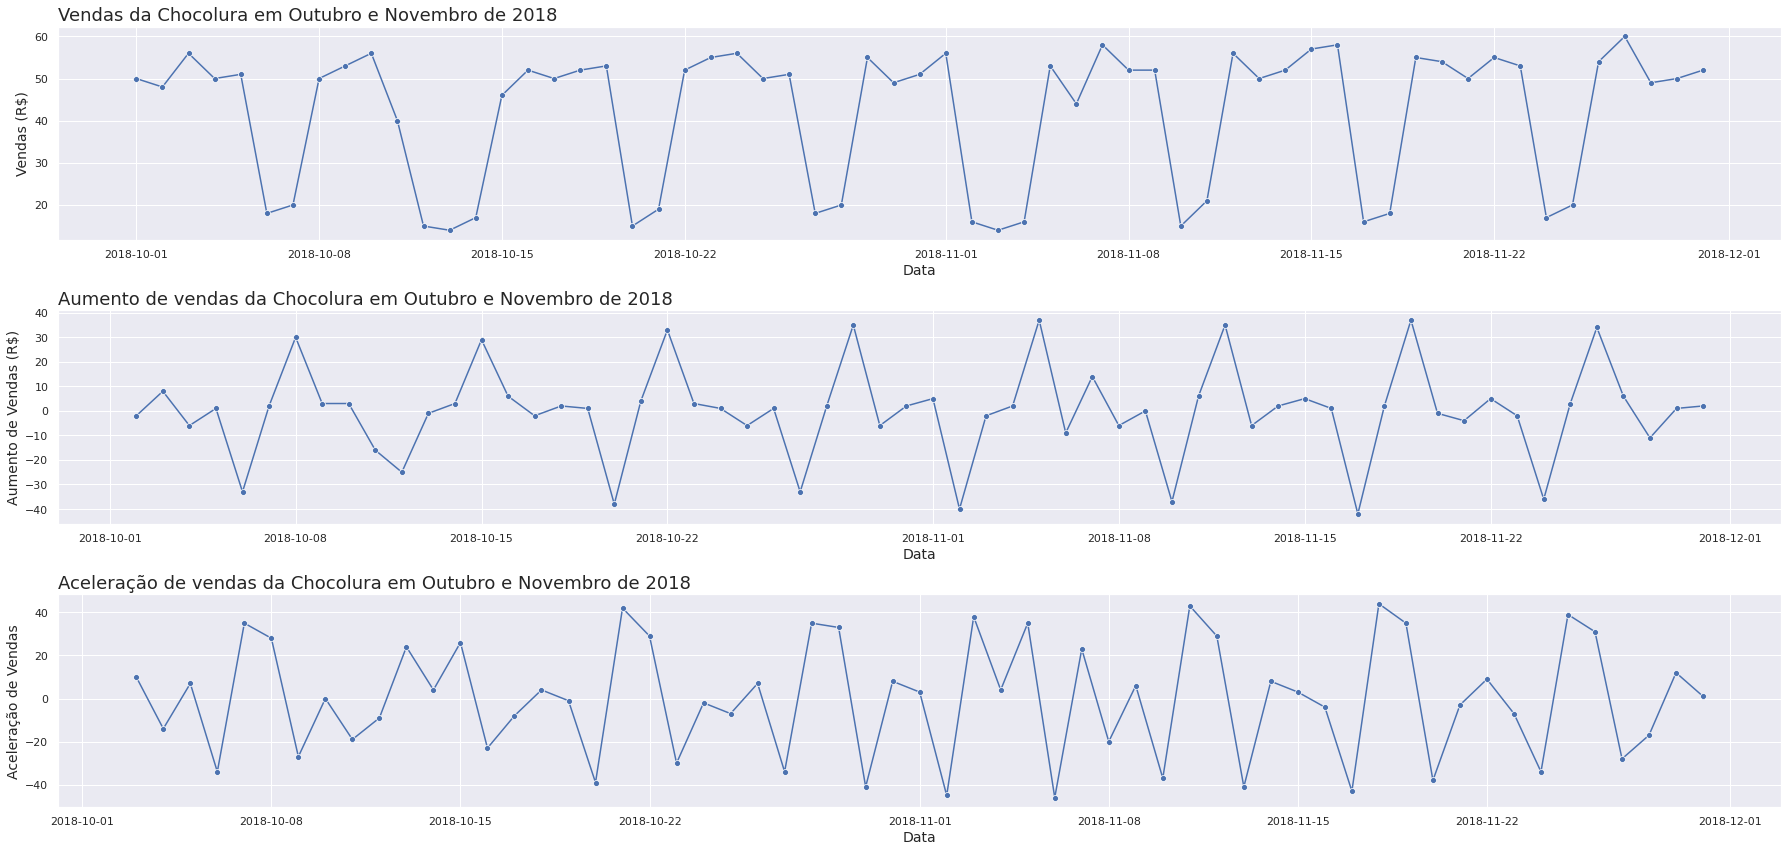

In [32]:
plt.subplot(3, 1, 1)
plot_grafico('dia', 'vendas', vendas_diarias, 'Vendas da Chocolura em Outubro e Novembro de 2018', 
             'Data', 'Vendas (R$)')
plt.subplot(3, 1, 2)
plot_grafico('dia', 'aumento', vendas_diarias, 'Aumento de vendas da Chocolura em Outubro e Novembro de 2018', 
             'Data', 'Aumento de Vendas (R$)')
plt.subplot(3, 1, 3)
plot_grafico('dia', 'aceleracao', vendas_diarias, 'Aceleração de vendas da Chocolura em Outubro e Novembro de 2018', 
             'Data', 'Aceleração de Vendas')

plt.tight_layout()

# 11. Análise da Sazonalidade

In [45]:
# Vamos criar uma coluna com os dias da semana e analisar os dados por dia da semana
vendas_diarias['dia_da_semana'] = vendas_diarias['dia'].dt.day_name()

In [46]:
vendas_diarias.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [47]:
vendas_diarias['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [48]:
dias_da_semana_num = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 
                      'Thursday': 4, 'Friday': 5, 'Saturday': 6,
                      'Sunday': 7}
vendas_diarias['dia_da_semana_num'] = vendas_diarias['dia_da_semana'].map(dias_da_semana_num)

In [49]:
vendas_diarias.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana,dia_da_semana_num
0,2018-10-01,50,NaN,NaN,Monday,1
1,2018-10-02,48,-2.0,NaN,Tuesday,2
2,2018-10-03,56,8.0,10.0,Wednesday,3
3,2018-10-04,50,-6.0,-14.0,Thursday,4
4,2018-10-05,51,1.0,7.0,Friday,5
5,2018-10-06,18,-33.0,-34.0,Saturday,6
6,2018-10-07,20,2.0,35.0,Sunday,7
7,2018-10-08,50,30.0,28.0,Monday,1
8,2018-10-09,53,3.0,-27.0,Tuesday,2
9,2018-10-10,56,3.0,0.0,Wednesday,3


In [55]:
vendas_dia_da_semana = vendas_diarias.groupby(
    ['dia_da_semana_num', 'dia_da_semana']
    )['vendas', 'aumento', 'aceleracao'].mean().round().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
vendas_dia_da_semana

,dia_da_semana_num,dia_da_semana,vendas,aumento,aceleracao
0,1,Monday,52.0,34.0,31.0
1,2,Tuesday,52.0,-1.0,-34.0
2,3,Wednesday,53.0,1.0,2.0
3,4,Thursday,51.0,-2.0,-3.0
4,5,Friday,45.0,-7.0,-5.0
5,6,Saturday,16.0,-28.0,-20.0
6,7,Sunday,19.0,3.0,31.0


In [60]:
vendas_diarias[(~vendas_diarias['dia_da_semana_num'].isin([6, 7])) & (vendas_diarias['vendas'] < 40)]

,dia,vendas,aumento,aceleracao,dia_da_semana,dia_da_semana_num
11,2018-10-12,15,-25.0,-9.0,Friday,5
32,2018-11-02,16,-40.0,-45.0,Friday,5


Podemos ver que as quedas nas vendas acontecem sempre nos finais de semana. Isso pode estar acontecendo por alguma decisão da empresa de funcionamento nesses dias ou até por um motivo de demanda. 

Duas sextas de feriado também apresentaram esse comportamento, provalvemente pelos mesmos motivos dos dias de final de semana.